## **Machine learning Project**
### By **Thomas Marchal** #20220714, **Louis Hislaire** #  and **Jules Rougier** # 


Step 1:
We choose the Dataset number D : House_data


Step 2: Scenario / About Dataset -> Jules

### _**3 - Data Loading (Thomas)**_
To load our House data, we need to load the required python librairies. We will use pandas in order to read our csv file. 

In [13]:
# Load required librairies
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"

Now, the librairies are imported and we can open our file using the read_csv function.

In [2]:
#Load the data
df = pd.read_csv("data/House_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


We can now manage our data and apply some changes to it !

Step 4: Data Wrangling or Data Pre-processing -> Louis

We will make the pre-processing of the data in order to be used properly in our different models.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21600 non-null  float64
 4   bathrooms      21603 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

We saw with the info function here that there are missing values in the bedrooms and bathrooms data.

We will use a module from Sklearn named SimpleImputer, that can fill missing data using a strategy. We will here use the mean strategy which will fill the missing data with the mean of the available data.

We have numerical values for all the values despite for the date.

For the numerical values, we will use a module given by the Sklearn library to scale the data by removing the mean and scaling to unit variance.

For the categorical date, we will also use a module of Sklearn, OrdinalEncoder, that encodes categorical features as an array of integers.

In [4]:
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns
categorical_features = df.select_dtypes(include=["object"]).columns

numerical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ("ordinal", OrdinalEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_pipeline, numerical_features),
        ("cat", categorical_pipeline, categorical_features)
    ],
    remainder="passthrough"
)

processed_data = preprocessor.fit_transform(df)

encoded_cat_cols = preprocessor.named_transformers_["cat"]["ordinal"].get_feature_names_out(categorical_features)
all_columns = list(numerical_features) + list(encoded_cat_cols)

# Convertir en DataFrame avec les noms originaux
processed_df = pd.DataFrame(processed_data, columns=all_columns)

processed_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date
0,0.886146,-0.866717,-0.402513,-1.451270,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,...,-0.734708,-0.658681,-0.544898,-0.210128,1.870152,-0.352572,-0.306079,-0.943355,-0.260715,164.0
1,0.637511,-0.005688,-0.402513,0.174641,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,...,0.460841,0.245141,-0.681079,4.746678,0.879568,1.161568,-0.746341,-0.432686,-0.187868,220.0
2,0.365444,-0.980849,-1.482011,-1.451270,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,...,-1.229834,-0.658681,-1.293892,-0.210128,-0.933388,1.283537,-0.135655,1.070140,-0.172375,290.0
3,-0.727656,0.174090,0.676985,1.150187,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,...,-0.891699,1.397515,-0.204446,-0.210128,1.085160,-0.283288,-1.271816,-0.914174,-0.284522,220.0
4,-0.912881,-0.081958,-0.402513,-0.150541,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,...,-0.130895,-0.658681,0.544548,-0.210128,-0.073636,0.409550,1.199335,-0.272190,-0.192849,283.0


In [5]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  float64
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  float64
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  float64
 5   sqft_lot       21613 non-null  float64
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  float64
 8   view           21613 non-null  float64
 9   condition      21613 non-null  float64
 10  grade          21613 non-null  float64
 11  sqft_above     21613 non-null  float64
 12  sqft_basement  21613 non-null  float64
 13  yr_built       21613 non-null  float64
 14  yr_renovated   21613 non-null  float64
 15  zipcode        21613 non-null  float64
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

The data is ready for our models !

## Step 5: Exploratory Data Analysis -> Thomas

#### ***Summary statistics for numerical features***
For each feature we can compute the mean, standart derivation, the minimum ect...

In [6]:
numerical_summary = df[numerical_features].describe()
numerical_summary

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### ***Features Distribution***
 Distribution plots for numerical features

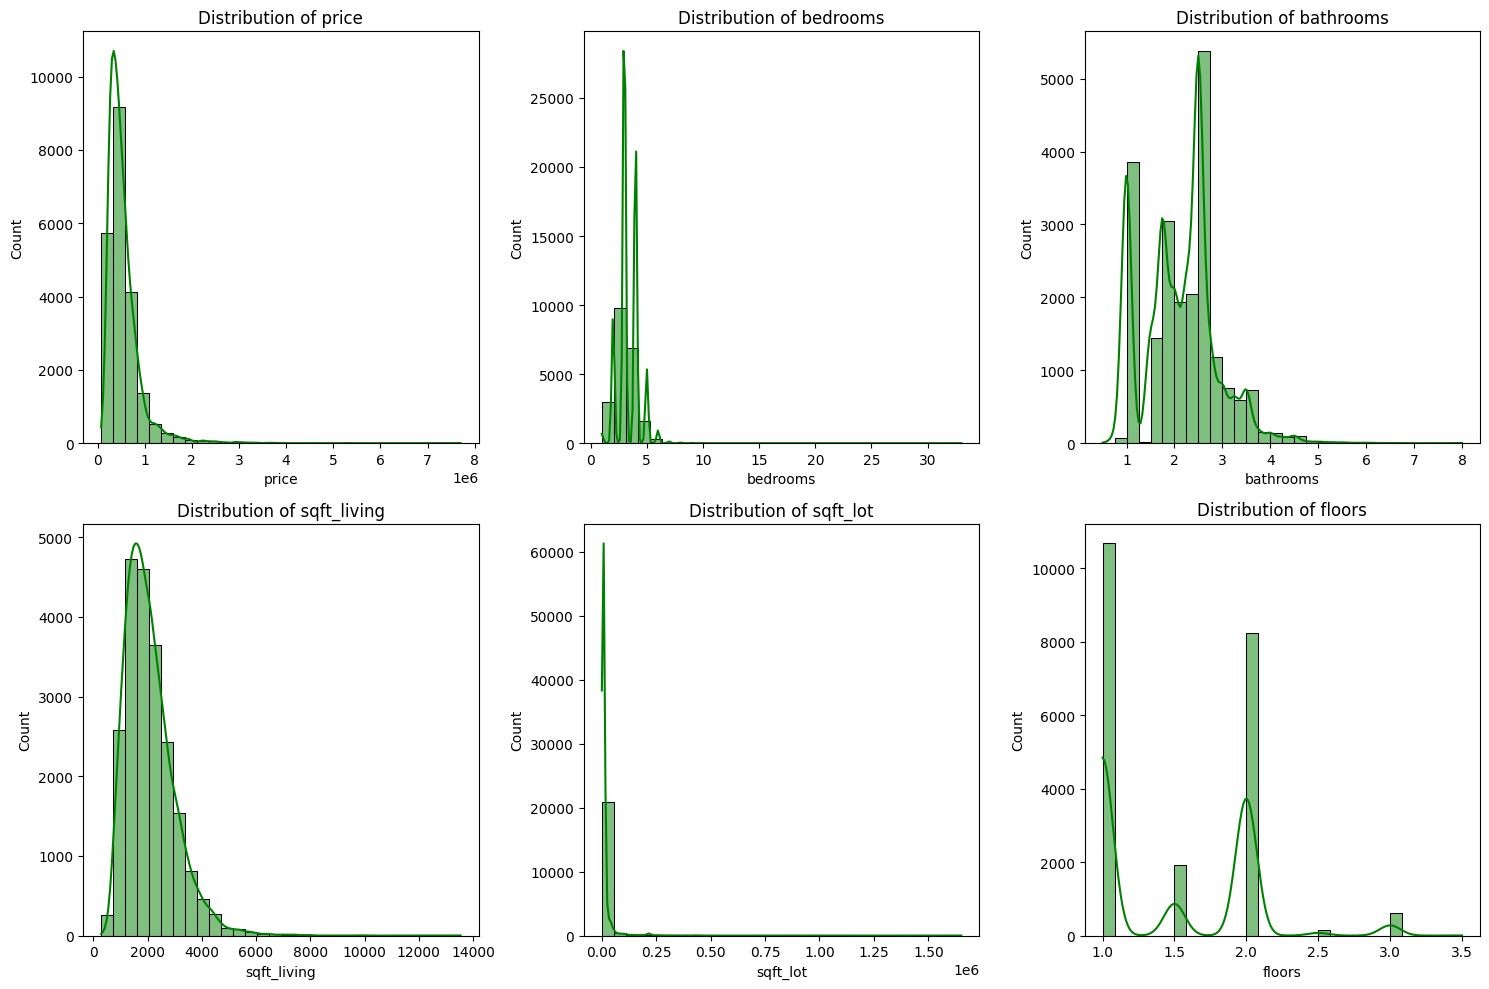

In [7]:
#Remove the 'id' column which is useless to compute it's distribution
numerical_features_no_id = numerical_features.drop("id")


plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features_no_id[:6], start=1): 
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='green')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

The data distribution of this dataset is not too large, it will be benefit for our model.

#### ***Explore Relationships Between Variables***
We used the correlation heatmaps to identify potential strong relationships between variables

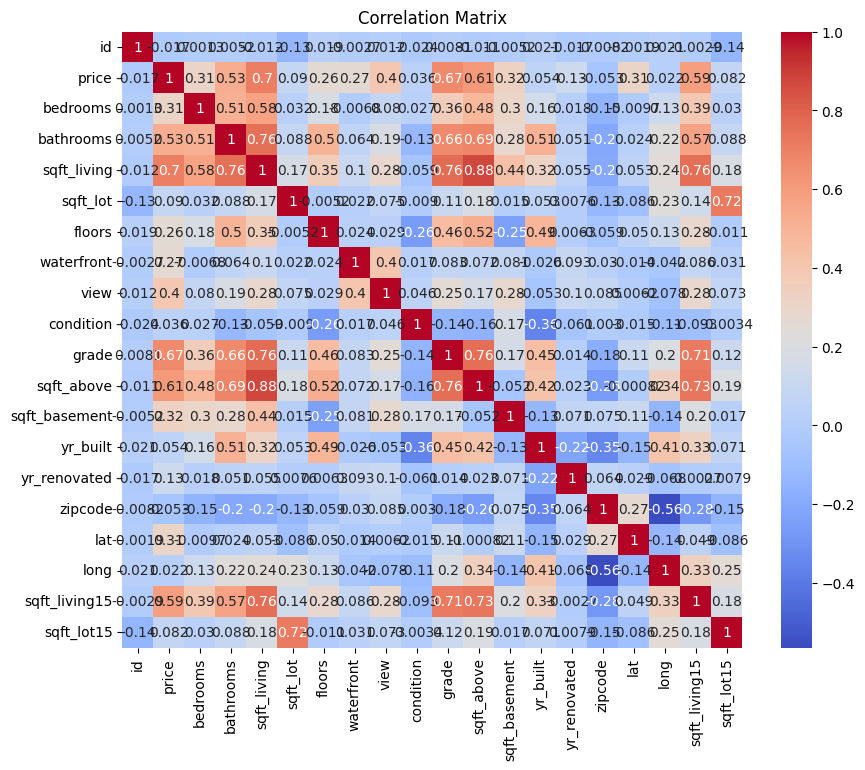

In [8]:
corr_matrix = processed_df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

We applied differents techniques of data exploration so we could understand our data set and we were able to understand **the relevant features.**
<br><br>
Some features are **highly correlated**, so we could **simplify** our dataset by removing or merging some features. Here, sqft_above is higly correlated (0.88) with sqft_living so the features are redundant for our model and could be simplified. We will drop the feature with a score higher than 0.8, here sqrt_above only.

In [9]:
# Drop the 'sqft_above' feature from the dataset as it is highly correlated with 'sqft_living'
df_reduced = processed_df.drop(columns=["sqft_above"])

numerical_features_reduced = numerical_features.drop("sqft_above")

df_reduced.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date
0,0.886146,-0.866717,-0.402513,-1.451270,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.658681,-0.544898,-0.210128,1.870152,-0.352572,-0.306079,-0.943355,-0.260715,164.0
1,0.637511,-0.005688,-0.402513,0.174641,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.245141,-0.681079,4.746678,0.879568,1.161568,-0.746341,-0.432686,-0.187868,220.0
2,0.365444,-0.980849,-1.482011,-1.451270,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-0.658681,-1.293892,-0.210128,-0.933388,1.283537,-0.135655,1.070140,-0.172375,290.0
3,-0.727656,0.174090,0.676985,1.150187,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,1.397515,-0.204446,-0.210128,1.085160,-0.283288,-1.271816,-0.914174,-0.284522,220.0
4,-0.912881,-0.081958,-0.402513,-0.150541,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.658681,0.544548,-0.210128,-0.073636,0.409550,1.199335,-0.272190,-0.192849,283.0


We can know apply our **machine learning algorithms !**

Step 6: Model Developement (Apply ML algorithms)
BONUS if we choose to use 2ML algorithms (see pdf) 1 normal + 2 dans les Bonus
Thomas/Louis/Jules

**KNN Regression** (K-Nearest Neighbors Regression) is a simple machine learning algorithm used for predicting continuous values. It works by identifying the Knnearest data points (neighbors) to a given point and estimating the target value as the average of their values.

Advantages:

    - Simplicity: Easy to understand and implement.
    - Non-parametric: Makes no assumptions about data distribution.
    - Versatility: Can model complex relationships in data.

In [ ]:
# Drop irrelevant columns and target the price of the houses
target_column = "price"
irrelevant_columns = ["id", "date"]

# We separate the features and target
X = df.drop(columns=[target_column] + irrelevant_columns)
y = df[target_column]

# Divide the numerical from the categorical features
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

# Define preprocessing pipelines
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder())
])

# Combine pipelines into a ColumnTransformer
preprocessor = ColumnTransformer([
    ("num", numerical_pipeline, numerical_features),
    ("cat", categorical_pipeline, categorical_features)
], remainder="passthrough")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with the KNN regressor
model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", KNeighborsRegressor(n_neighbors=5))
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Test the model of one element from our data, here we choose 1 but we could have choosen different ones.
sample_idx = 1
sample_features = X_test.iloc[sample_idx:sample_idx+1]
sample_actual_price = y_test.iloc[sample_idx]

# We predict the price using our modeL.
predicted_price = model_pipeline.predict(sample_features)[0]
sample_features, sample_actual_price, predicted_price

# Display the actual and the predicted one
sample_actual_price = int(sample_actual_price)
predicted_price = float(predicted_price)
print(f"Actual Price: ${sample_actual_price}")
print(f"Predicted Price: ${predicted_price}")

Actual Price: $865000
Predicted Price: $707590.0


Step 7: Model Evaluation, Implement and compare different metrics to evaluate the quality of the model.
Chaque model Thomas/Louis/Jules

Step 8: Model Refinement -> Jules

Step Final : Harmoniser le doc pour un rendu propre facile à présenter